# spark准备工作

In [34]:
%%spark.set_config

spark.executor.instances=1
spark.executor.memory=512m
spark.executor.cores=1

In [35]:
spark, sc = %spark.get_session PeiSiyu3

24/05/28 09:10:14 WARN [Thread-4] Client: Neither spark.yarn.jars nor spark.yarn.archive is set, falling back to uploading libraries under SPARK_HOME.


# 读入数据

In [36]:
ratings = spark.read.options(header='true', inferSchema='true').csv("/user/peisiyu/ratings.csv") 
ratings.show()

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|     1|      1|   4.0|964982703|
|     1|      3|   4.0|964981247|
|     1|      6|   4.0|964982224|
|     1|     47|   5.0|964983815|
|     1|     50|   5.0|964982931|
|     1|     70|   3.0|964982400|
|     1|    101|   5.0|964980868|
|     1|    110|   4.0|964982176|
|     1|    151|   5.0|964984041|
|     1|    157|   5.0|964984100|
|     1|    163|   5.0|964983650|
|     1|    216|   5.0|964981208|
|     1|    223|   3.0|964980985|
|     1|    231|   5.0|964981179|
|     1|    235|   4.0|964980908|
|     1|    260|   5.0|964981680|
|     1|    296|   3.0|964982967|
|     1|    316|   3.0|964982310|
|     1|    333|   5.0|964981179|
|     1|    349|   4.0|964982563|
+------+-------+------+---------+
only showing top 20 rows



In [37]:
movies = spark.read.options(header='true', inferSchema='true').csv("/user/peisiyu/movies.csv") 
movies.show()

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
|      6|         Heat (1995)|Action|Crime|Thri...|
|      7|      Sabrina (1995)|      Comedy|Romance|
|      8| Tom and Huck (1995)|  Adventure|Children|
|      9| Sudden Death (1995)|              Action|
|     10|    GoldenEye (1995)|Action|Adventure|...|
|     11|American Presiden...|Comedy|Drama|Romance|
|     12|Dracula: Dead and...|       Comedy|Horror|
|     13|        Balto (1995)|Adventure|Animati...|
|     14|        Nixon (1995)|               Drama|
|     15|Cutthroat Island ...|Action|Adventure|...|
|     16|       Casino (1995)|         Crime|Drama|
|     17|Sen

In [38]:
tags = spark.read.options(header='true', inferSchema='true').csv("/user/peisiyu/tags.csv") 
tags.show()

+------+-------+-----------------+----------+
|userId|movieId|              tag| timestamp|
+------+-------+-----------------+----------+
|     2|  60756|            funny|1445714994|
|     2|  60756|  Highly quotable|1445714996|
|     2|  60756|     will ferrell|1445714992|
|     2|  89774|     Boxing story|1445715207|
|     2|  89774|              MMA|1445715200|
|     2|  89774|        Tom Hardy|1445715205|
|     2| 106782|            drugs|1445715054|
|     2| 106782|Leonardo DiCaprio|1445715051|
|     2| 106782|  Martin Scorsese|1445715056|
|     7|  48516|     way too long|1169687325|
|    18|    431|        Al Pacino|1462138765|
|    18|    431|         gangster|1462138749|
|    18|    431|            mafia|1462138755|
|    18|   1221|        Al Pacino|1461699306|
|    18|   1221|            Mafia|1461699303|
|    18|   5995|        holocaust|1455735472|
|    18|   5995|       true story|1455735479|
|    18|  44665|     twist ending|1456948283|
|    18|  52604|  Anthony Hopkins|

In [39]:
# 去除时间戳
new_ratings = ratings[['userId', 'movieId', 'rating']]
new_ratings.show()

+------+-------+------+
|userId|movieId|rating|
+------+-------+------+
|     1|      1|   4.0|
|     1|      3|   4.0|
|     1|      6|   4.0|
|     1|     47|   5.0|
|     1|     50|   5.0|
|     1|     70|   3.0|
|     1|    101|   5.0|
|     1|    110|   4.0|
|     1|    151|   5.0|
|     1|    157|   5.0|
|     1|    163|   5.0|
|     1|    216|   5.0|
|     1|    223|   3.0|
|     1|    231|   5.0|
|     1|    235|   4.0|
|     1|    260|   5.0|
|     1|    296|   3.0|
|     1|    316|   3.0|
|     1|    333|   5.0|
|     1|    349|   4.0|
+------+-------+------+
only showing top 20 rows



In [8]:
new_ratings.count()

100836

# 文本卷积神经网络（已失败）

In [9]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover, CountVectorizer
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

In [18]:
# 新增指定用户和电影进行评分
user_id = 1
movie_id = 2
rating = 5.0

In [25]:
# 将这条评分数据添加到原始的评分数据中
add_ratings = spark.createDataFrame([(user_id, movie_id, rating)], ["userId", "movieId", "rating"])
add_ratings.show()

+------+-------+------+
|userId|movieId|rating|
+------+-------+------+
|     1|      2|   5.0|
+------+-------+------+



In [27]:
# 查看加入新记录后的表格
add_ratings = add_ratings.union(new_ratings)
add_ratings.show()

+------+-------+------+
|userId|movieId|rating|
+------+-------+------+
|     1|      2|   5.0|
|     1|      1|   4.0|
|     1|      3|   4.0|
|     1|      6|   4.0|
|     1|     47|   5.0|
|     1|     50|   5.0|
|     1|     70|   3.0|
|     1|    101|   5.0|
|     1|    110|   4.0|
|     1|    151|   5.0|
|     1|    157|   5.0|
|     1|    163|   5.0|
|     1|    216|   5.0|
|     1|    223|   3.0|
|     1|    231|   5.0|
|     1|    235|   4.0|
|     1|    260|   5.0|
|     1|    296|   3.0|
|     1|    316|   3.0|
|     1|    333|   5.0|
+------+-------+------+
only showing top 20 rows



In [40]:
# 提取电影类别
movie_genres = movies.select("movieId", "genres")
movie_genres.show()

+-------+--------------------+
|movieId|              genres|
+-------+--------------------+
|      1|Adventure|Animati...|
|      2|Adventure|Childre...|
|      3|      Comedy|Romance|
|      4|Comedy|Drama|Romance|
|      5|              Comedy|
|      6|Action|Crime|Thri...|
|      7|      Comedy|Romance|
|      8|  Adventure|Children|
|      9|              Action|
|     10|Action|Adventure|...|
|     11|Comedy|Drama|Romance|
|     12|       Comedy|Horror|
|     13|Adventure|Animati...|
|     14|               Drama|
|     15|Action|Adventure|...|
|     16|         Crime|Drama|
|     17|       Drama|Romance|
|     18|              Comedy|
|     19|              Comedy|
|     20|Action|Comedy|Cri...|
+-------+--------------------+
only showing top 20 rows



In [32]:
# 构建文本特征提取流水线
tokenizer = Tokenizer(inputCol="genres", outputCol="words")
stopwords_remover = StopWordsRemover(inputCol="words", outputCol="filtered_words")
vectorizer = CountVectorizer(inputCol="filtered_words", outputCol="features")

In [33]:
pipeline = Pipeline(stages=[tokenizer, stopwords_remover, vectorizer])

In [34]:
# 训练文本特征提取流水线
pipeline_model = pipeline.fit(movie_genres)
movie_features = pipeline_model.transform(movie_genres)

In [52]:
movie_features

DataFrame[movieId: int, genres: string, words: array<string>, filtered_words: array<string>, features: vector]

In [53]:
movie_features.show()

+-------+--------------------+--------------------+--------------------+-----------------+
|movieId|              genres|               words|      filtered_words|         features|
+-------+--------------------+--------------------+--------------------+-----------------+
|      1|Adventure|Animati...|[adventure|animat...|[adventure|animat...|(953,[110],[1.0])|
|      2|Adventure|Childre...|[adventure|childr...|[adventure|childr...| (953,[66],[1.0])|
|      3|      Comedy|Romance|    [comedy|romance]|    [comedy|romance]|  (953,[3],[1.0])|
|      4|Comedy|Drama|Romance|[comedy|drama|rom...|[comedy|drama|rom...|  (953,[6],[1.0])|
|      5|              Comedy|            [comedy]|            [comedy]|  (953,[1],[1.0])|
|      6|Action|Crime|Thri...|[action|crime|thr...|[action|crime|thr...| (953,[19],[1.0])|
|      7|      Comedy|Romance|    [comedy|romance]|    [comedy|romance]|  (953,[3],[1.0])|
|      8|  Adventure|Children|[adventure|children]|[adventure|children]| (953,[72],[1.0])|

In [99]:
movie_genres.count()

9742

In [101]:
movie_features.count()

9742

# 可视化

## 电影评分榜

In [10]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, avg, count
import pyspark.sql.functions as F

In [122]:
# 计算每部电影的平均评分和评分人数
movie_ratings = ratings.groupBy("movieId").agg(avg("rating").alias("AverageRating"), count("userId").alias("NumRatings"))

In [145]:
movie_ratings.show()

+-------+------------------+----------+
|movieId|     AverageRating|NumRatings|
+-------+------------------+----------+
|   1580| 3.487878787878788|       165|
|   2366|              3.64|        25|
|   3175|              3.58|        75|
|   1088| 3.369047619047619|        42|
|  32460|              4.25|         4|
|  44022| 3.217391304347826|        23|
|  96488|              4.25|         4|
|   1238| 4.055555555555555|         9|
|   1342|               2.5|        11|
|   1591|2.6346153846153846|        26|
|   1645| 3.411764705882353|        51|
|   4519|3.3333333333333335|         9|
|   2142|               2.7|        10|
|    471|              3.55|        40|
|   3997|1.8333333333333333|        12|
|    833|               2.0|         6|
|   3918|3.2777777777777777|         9|
|   7982|              3.25|         4|
|   1959|3.6666666666666665|        15|
|  68135|              3.55|        10|
+-------+------------------+----------+
only showing top 20 rows



In [125]:
joined_table = movie_ratings.join(movies, on='movieId', how='inner')
joined_table.show()

+-------+------------------+----------+--------------------+--------------------+
|movieId|     AverageRating|NumRatings|               title|              genres|
+-------+------------------+----------+--------------------+--------------------+
|   1580| 3.487878787878788|       165|Men in Black (a.k...|Action|Comedy|Sci-Fi|
|   2366|              3.64|        25|    King Kong (1933)|Action|Adventure|...|
|   3175|              3.58|        75| Galaxy Quest (1999)|Adventure|Comedy|...|
|   1088| 3.369047619047619|        42|Dirty Dancing (1987)|Drama|Musical|Rom...|
|  32460|              4.25|         4|Knockin' on Heave...|Action|Comedy|Cri...|
|  44022| 3.217391304347826|        23|Ice Age 2: The Me...|Adventure|Animati...|
|  96488|              4.25|         4|Searching for Sug...|         Documentary|
|   1238| 4.055555555555555|         9|   Local Hero (1983)|              Comedy|
|   1342|               2.5|        11|     Candyman (1992)|     Horror|Thriller|
|   1591|2.63461

In [130]:
movie_ratings.filter(movie_ratings.movieId == 26350).show()

+-------+-------------+----------+
|movieId|AverageRating|NumRatings|
+-------+-------------+----------+
|  26350|          5.0|         1|
+-------+-------------+----------+



In [129]:
# 获取AverageRating前20的电影数据
top_20_ratings = joined_table.orderBy(F.desc('AverageRating')).limit(20).toPandas()
top_20_ratings

,movieId,AverageRating,NumRatings,title,genres
0,26350,5.0,1,"Passenger, The (Professione: reporter) (1975)",Drama
1,159811,5.0,1,The Bremen Town Musicians (1969),Animation|Drama|Fantasy
2,25887,5.0,1,Tales of Manhattan (1942),Comedy|Drama
3,148,5.0,1,"Awfully Big Adventure, An (1995)",Drama
4,633,5.0,1,Denise Calls Up (1995),Comedy
5,126921,5.0,1,The Fox and the Hound 2 (2006),Adventure|Animation|Children|Comedy
6,33138,5.0,1,Palindromes (2004),Adventure|Comedy|Drama
7,150554,5.0,1,The Love Bug (1997),Adventure|Children|Comedy|Fantasy
8,157775,5.0,1,Tenchi Muyô! In Love (1996),Animation|Comedy
9,8911,5.0,1,Raise Your Voice (2004),Romance


In [132]:
# 获取NumRatings前20的电影数据
top_20_num_ratings = joined_table.orderBy(F.desc('NumRatings')).limit(20).toPandas()
top_20_num_ratings


,movieId,AverageRating,NumRatings,title,genres
0,356,4.164134,329,Forrest Gump (1994),Comedy|Drama|Romance|War
1,318,4.429022,317,"Shawshank Redemption, The (1994)",Crime|Drama
2,296,4.197068,307,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,593,4.161290,279,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
4,2571,4.192446,278,"Matrix, The (1999)",Action|Sci-Fi|Thriller
5,260,4.231076,251,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
6,480,3.750000,238,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
7,110,4.031646,237,Braveheart (1995),Action|Drama|War
8,589,3.970982,224,Terminator 2: Judgment Day (1991),Action|Sci-Fi
9,527,4.225000,220,Schindler's List (1993),Drama|War


In [135]:
# 过滤NumRatings大于等于100的电影
filtered_movies = joined_table.filter(joined_table.NumRatings >= 100)
filtered_movies.show()

+-------+------------------+----------+--------------------+--------------------+
|movieId|     AverageRating|NumRatings|               title|              genres|
+-------+------------------+----------+--------------------+--------------------+
|   1580| 3.487878787878788|       165|Men in Black (a.k...|Action|Comedy|Sci-Fi|
|   1721| 3.414285714285714|       140|      Titanic (1997)|       Drama|Romance|
|    858|         4.2890625|       192|Godfather, The (1...|         Crime|Drama|
|   1270| 4.038011695906433|       171|Back to the Futur...|Adventure|Comedy|...|
|   1265| 3.944055944055944|       143|Groundhog Day (1993)|Comedy|Fantasy|Ro...|
|    588|3.7923497267759565|       183|      Aladdin (1992)|Adventure|Animati...|
|    296| 4.197068403908795|       307| Pulp Fiction (1994)|Comedy|Crime|Dram...|
|  68954| 4.004761904761905|       105|           Up (2009)|Adventure|Animati...|
|  58559| 4.238255033557047|       149|Dark Knight, The ...|Action|Crime|Dram...|
|    593| 4.1612

In [136]:
# 按照AverageRating降序排序，选择前20个电影数据
top_20_average_ratings = filtered_movies.orderBy(F.desc('AverageRating')).limit(20).toPandas()
top_20_average_ratings

,movieId,AverageRating,NumRatings,title,genres
0,318,4.429022,317,"Shawshank Redemption, The (1994)",Crime|Drama
1,858,4.289062,192,"Godfather, The (1972)",Crime|Drama
2,2959,4.272936,218,Fight Club (1999),Action|Crime|Drama|Thriller
3,1221,4.259690,129,"Godfather: Part II, The (1974)",Crime|Drama
4,48516,4.252336,107,"Departed, The (2006)",Crime|Drama|Thriller
5,1213,4.250000,126,Goodfellas (1990),Crime|Drama
6,912,4.240000,100,Casablanca (1942),Drama|Romance
7,58559,4.238255,149,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
8,50,4.237745,204,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
9,1197,4.232394,142,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance


In [146]:
# 提取title和AverageRating列作为字典数据
data = top_20_average_ratings[['title', 'AverageRating']].set_index('title').to_dict()['AverageRating']
data


{'Shawshank Redemption, The (1994)': 4.429022082018927,
 'Godfather, The (1972)': 4.2890625,
 'Fight Club (1999)': 4.272935779816514,
 'Godfather: Part II, The (1974)': 4.25968992248062,
 'Departed, The (2006)': 4.252336448598131,
 'Goodfellas (1990)': 4.25,
 'Casablanca (1942)': 4.24,
 'Dark Knight, The (2008)': 4.238255033557047,
 'Usual Suspects, The (1995)': 4.237745098039215,
 'Princess Bride, The (1987)': 4.232394366197183,
 'Star Wars: Episode IV - A New Hope (1977)': 4.231075697211155,
 "Schindler's List (1993)": 4.225,
 'Apocalypse Now (1979)': 4.219626168224299,
 'American History X (1998)': 4.217054263565892,
 'Star Wars: Episode V - The Empire Strikes Back (1980)': 4.2156398104265405,
 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)': 4.2075,
 "One Flew Over the Cuckoo's Nest (1975)": 4.203007518796992,
 'Reservoir Dogs (1992)': 4.202290076335878,
 'Pulp Fiction (1994)': 4.197068403908795,
 'Matrix, The (1999)': 4.192446043165468}

In [ ]:
# 创建条形图
plt.figure(figsize=(10, 6))
plt.barh(range(len(data)), list(data.values()), align='center')
plt.yticks(range(len(data)), list(data.keys()))
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top 20 Movies by Average Rating (NumRatings >= 100)')
plt.gca().invert_yaxis()  # 反转y轴，使得电影按照从上到下的顺序排列
plt.tight_layout()  # 调整图表布局，防止标签重叠
plt.show()

## 用户标签榜

In [252]:
# 提取"tag"列数据
tags = tags.select("tag").rdd.flatMap(lambda x: x).collect()

In [59]:
# 将所有tag拼接成字符串
tags_text = " ".join(tags)

In [112]:
# 创建RDD并清洗数据
stop_words = [
    'a', 'an', 'the', 'in', 'on', 'at', 'to', 'for', 'of', 'by', 'with', 'about', 'after', 'before',
    'over', 'under', 'between', 'among', 'during', 'through', 'into', 'out', 'up', 'down', 'off',
    'above', 'below', 'from', 'into', 'onto', 'throughout', 'inside', 'outside', 'beneath', 'beyond',
    'until', 'unless', 'although', 'because', 'since', 'while', 'when', 'where', 'whether', 'if',
    'both', 'either', 'neither', 'nor', 'not', 'only', 'just', 'as', 'such', 'like', 'than', 'so',
    'too', 'very', 'really', 'quite', 'more', 'less', 'few', 'many', 'most', 'some', 'any', 'no',
    'every', 'all', 'other', 'another', 'each', 'some', 'few', 'several', 'many', 'much', 'little',
    'fewer', 'less', 'most', 'more', 'only', 'just', 'same', 'different', 'own', 'my', 'your', 'his',
    'her', 'their', 'our', 'its', 'any', 'some', 'no', 'every', 'each', 'other', 'another', 'such',
    'this', 'that', 'these', 'those', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight',
    'nine', 'ten', 'first', 'second', 'third', 'last', 'few', 'several', 'many', 'much', 'some',
    'any', 'lot', 'plenty', 'more', 'most', 'all', 'somebody', 'someone', 'something', 'nobody',
    'none', 'nothing', 'everyone', 'everything', 'anybody', 'anything', 'both', 'either', 'neither',
    'everybody', 'everything', 'another', 'other', 'such', 'what', 'which', 'who', 'whom', 'whose',
    'where', 'when', 'why', 'how', 'whether', 'whatsoever', 'wherever', 'whenever', 'however',
    'somewhat', 'somewhere', 'somehow', 'anyway', 'anywhere', 'anyhow', 'further', 'furthermore',
    'besides', 'also', 'too', 'moreover', 'nevertheless', 'nonetheless', 'however', 'otherwise',
    'instead', 'meanwhile', 'therefore', 'thus', 'hence', 'consequently', 'accordingly', 'indeed','and']
tags_rdd = sc.parallelize([tags_text])
words_rdd = tags_rdd.flatMap(lambda line: line.split(" ")) \
                   .map(lambda word: word.lower()) \
                   .filter(lambda word: word not in stop_words)  # 停用词过滤

In [113]:
# 计算单词频率
word_counts = words_rdd.countByValue()
word_counts_dict = dict(word_counts)

In [ ]:
word_counts_dict

In [115]:
# 获取出现频率前20高的词语和对应的频率
top20_words = sorted(word_counts_dict, key=word_counts_dict.get, reverse=True)[:20]
top20_counts = [word_counts_dict[word] for word in top20_words]

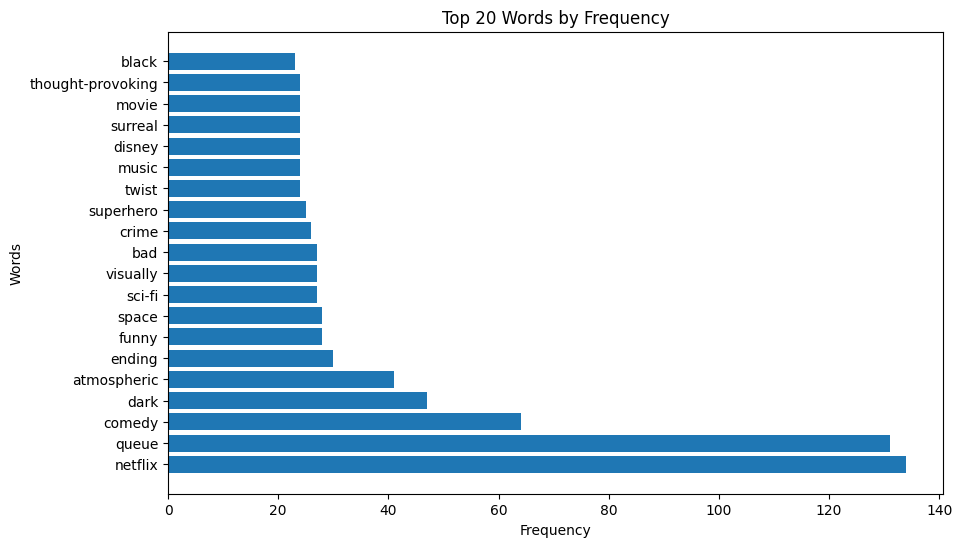

In [116]:
# 绘制条形图
plt.figure(figsize=(10, 6))
plt.barh(range(len(top20_words)), top20_counts, align='center')
plt.yticks(range(len(top20_words)), top20_words)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Words by Frequency')
plt.show()

# 新的尝试：聚类

In [41]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml import Pipeline

In [42]:
# 特征工程
indexer = StringIndexer(inputCol="genres", outputCol="genres_index")
encoder = OneHotEncoder(inputCol="genres_index", outputCol="genres_encoded")
assembler = VectorAssembler(inputCols=["genres_encoded"], outputCol="features")
pipeline = Pipeline(stages=[indexer, encoder, assembler])

In [43]:
# 构建特征转换流水线并进行转换
pipeline_model = pipeline.fit(movie_genres)
movie_features = pipeline_model.transform(movie_genres).select("movieId", "features")

In [16]:
movie_features.show()

+-------+-----------------+
|movieId|         features|
+-------+-----------------+
|      1|(950,[109],[1.0])|
|      2| (950,[63],[1.0])|
|      3|  (950,[3],[1.0])|
|      4|  (950,[6],[1.0])|
|      5|  (950,[1],[1.0])|
|      6| (950,[19],[1.0])|
|      7|  (950,[3],[1.0])|
|      8| (950,[68],[1.0])|
|      9| (950,[22],[1.0])|
|     10| (950,[36],[1.0])|
|     11|  (950,[6],[1.0])|
|     12| (950,[17],[1.0])|
|     13| (950,[90],[1.0])|
|     14|  (950,[0],[1.0])|
|     15|(950,[216],[1.0])|
|     16| (950,[10],[1.0])|
|     17|  (950,[4],[1.0])|
|     18|  (950,[1],[1.0])|
|     19|  (950,[1],[1.0])|
|     20|(950,[190],[1.0])|
+-------+-----------------+
only showing top 20 rows



## 这里是聚类的第三次尝试，与第一次尝试有所结合

In [45]:
# 划分训练集和测试集
(training_data, test_data) = movie_features.randomSplit([0.8, 0.2], seed=42)

In [46]:
# 使用K-Means聚类
kmeans = KMeans(seed=42)
evaluator = ClusteringEvaluator()

In [47]:
# 构建参数网格
param_grid = ParamGridBuilder() \
    .addGrid(kmeans.k, [5, 10, 15]) \
    .build()

In [48]:
# 创建交叉验证评估器
crossval = CrossValidator(estimator=kmeans,
                          estimatorParamMaps=param_grid,
                          evaluator=evaluator,
                          numFolds=3)

In [50]:
# 在训练集上训练模型
model = crossval.fit(training_data)


24/05/28 09:13:14 WARN [Thread-4] CacheManager: Asked to cache already cached data.
24/05/28 09:13:14 WARN [Thread-4] CacheManager: Asked to cache already cached data.


In [51]:
# 在测试集上进行预测
predictions = model.transform(test_data)

In [52]:
# 评估模型性能
silhouette_score = evaluator.evaluate(predictions)
print("Silhouette Score: ", silhouette_score)

Silhouette Score:  0.3791500404013775


In [67]:
# 获取训练出的聚类模型
best_model = model.bestModel

In [68]:
# 获取聚类中心
centroids = best_model.clusterCenters()

In [72]:
# 获取聚类中心数目
num_clusters = len(best_model.clusterCenters())
# 输出聚类中心数目
print("Number of Clusters: ", num_clusters)

Number of Clusters:  15


In [69]:
# 输出聚类中心
for cluster_id, centroid in enumerate(centroids):
    print("Cluster ID: ", cluster_id)
    print("Centroid: ", centroid)
    print("============================")

Cluster ID:  0
Centroid:  [0.         0.14717859 0.         0.         0.         0.
 0.         0.02637192 0.         0.         0.         0.02055459
 0.01764592 0.0172581  0.01473725 0.01337987 0.01085903 0.01124685
 0.0104712  0.00969556 0.00930774 0.00950165 0.00950165 0.00988947
 0.00833818 0.00775645 0.         0.00659298 0.00678689 0.00639907
 0.00775645 0.00620516 0.0069808  0.0069808  0.00678689 0.00562342
 0.00562342 0.00620516 0.00659298 0.00542951 0.00659298 0.00562342
 0.         0.00504169 0.00581734 0.         0.00542951 0.0052356
 0.00620516 0.0052356  0.00504169 0.00484778 0.00484778 0.0052356
 0.0052356  0.00465387 0.00445996 0.00465387 0.00465387 0.00329649
 0.0034904  0.00387822 0.00368431 0.00407213 0.00445996 0.00407213
 0.00407213 0.00290867 0.00290867 0.00407213 0.00426605 0.00329649
 0.00290867 0.0034904  0.00368431 0.00271476 0.00290867 0.00387822
 0.00271476 0.00310258 0.00310258 0.00290867 0.00232693 0.00310258
 0.00290867 0.00271476 0.00271476 0.00290867 0

## 下面是对单个用户聚类标签的判断

In [88]:
user_id = 1  # 用户ID作为输入
user_ratings = new_ratings.filter(col("userId") == user_id).select("movieId", "rating")

In [89]:
#将用户评分数据与电影类型数据进行连接
user_movies = user_ratings.join(movie_genres, on="movieId", how="inner")

In [90]:
#使用之前构建的特征转换流水线获取用户电影的特征向量
user_movies_features = pipeline_model.transform(user_movies).select("movieId", "features")

In [91]:
#预测用户的聚类标签：
user_cluster = model.transform(user_movies_features).select("prediction").first()[0]
user_cluster

0

In [92]:
#找到同一聚类中的电影
cluster_movies = model.transform(movie_features).where(col("prediction") == user_cluster).select("movieId")
cluster_movies.show()

+-------+
|movieId|
+-------+
|      1|
|      2|
|      5|
|      6|
|      8|
|      9|
|     10|
|     12|
|     13|
|     15|
|     18|
|     19|
|     20|
|     21|
|     22|
|     23|
|     24|
|     27|
|     29|
|     32|
+-------+
only showing top 20 rows



In [93]:
#找到用户打过分的电影
user_movies.show()

+-------+------+--------------------+
|movieId|rating|              genres|
+-------+------+--------------------+
|      1|   4.0|Adventure|Animati...|
|      3|   4.0|      Comedy|Romance|
|      6|   4.0|Action|Crime|Thri...|
|     47|   5.0|    Mystery|Thriller|
|     50|   5.0|Crime|Mystery|Thr...|
|     70|   3.0|Action|Comedy|Hor...|
|    101|   5.0|Adventure|Comedy|...|
|    110|   4.0|    Action|Drama|War|
|    151|   5.0|Action|Drama|Roma...|
|    157|   5.0|          Comedy|War|
|    163|   5.0|Action|Romance|We...|
|    216|   5.0|              Comedy|
|    223|   3.0|              Comedy|
|    231|   5.0|    Adventure|Comedy|
|    235|   4.0|        Comedy|Drama|
|    260|   5.0|Action|Adventure|...|
|    296|   3.0|Comedy|Crime|Dram...|
|    316|   3.0|Action|Adventure|...|
|    333|   5.0|              Comedy|
|    349|   4.0|Action|Crime|Dram...|
+-------+------+--------------------+
only showing top 20 rows



## 改变用户ID

In [94]:
user_id = 2  # 用户ID作为输入
user_ratings = new_ratings.filter(col("userId") == user_id).select("movieId", "rating")

In [95]:
#将用户评分数据与电影类型数据进行连接
user_movies = user_ratings.join(movie_genres, on="movieId", how="inner")

In [96]:
#使用之前构建的特征转换流水线获取用户电影的特征向量
user_movies_features = pipeline_model.transform(user_movies).select("movieId", "features")

In [97]:
user_movies_features.show()

+-------+-----------------+
|movieId|         features|
+-------+-----------------+
|    318| (950,[10],[1.0])|
|    333|  (950,[1],[1.0])|
|   1704|  (950,[4],[1.0])|
|   3578| (950,[60],[1.0])|
|   6874| (950,[19],[1.0])|
|   8798| (950,[21],[1.0])|
|  46970| (950,[14],[1.0])|
|  48516| (950,[11],[1.0])|
|  58559|(950,[381],[1.0])|
|  60756|  (950,[1],[1.0])|
|  68157| (950,[33],[1.0])|
|  71535|(950,[219],[1.0])|
|  74458| (950,[35],[1.0])|
|  77455| (950,[53],[1.0])|
|  79132|(950,[614],[1.0])|
|  80489| (950,[11],[1.0])|
|  80906|  (950,[5],[1.0])|
|  86345|  (950,[1],[1.0])|
|  89774|  (950,[0],[1.0])|
|  91529|(950,[539],[1.0])|
+-------+-----------------+
only showing top 20 rows



In [98]:
#预测用户的聚类标签：
user_cluster = model.transform(user_movies_features).select("prediction").first()[0]
user_cluster

12

In [99]:
#找到同一聚类中的电影
cluster_movies = model.transform(movie_features).where(col("prediction") == user_cluster).select("movieId")
cluster_movies.show()

+-------+
|movieId|
+-------+
|     16|
|     30|
|     36|
|     97|
|    117|
|    247|
|    283|
|    290|
|    318|
|    391|
|    409|
|    431|
|    806|
|    858|
|   1084|
|   1114|
|   1213|
|   1221|
|   1227|
|   1466|
+-------+
only showing top 20 rows



In [100]:
#找到用户打过分的电影
user_movies.show()

+-------+------+--------------------+
|movieId|rating|              genres|
+-------+------+--------------------+
|    318|   3.0|         Crime|Drama|
|    333|   4.0|              Comedy|
|   1704|   4.5|       Drama|Romance|
|   3578|   4.0|Action|Adventure|...|
|   6874|   4.0|Action|Crime|Thri...|
|   8798|   3.5|Action|Crime|Dram...|
|  46970|   4.0|       Action|Comedy|
|  48516|   4.0|Crime|Drama|Thriller|
|  58559|   4.5|Action|Crime|Dram...|
|  60756|   5.0|              Comedy|
|  68157|   4.5|    Action|Drama|War|
|  71535|   3.0|Action|Comedy|Horror|
|  74458|   4.0|Drama|Mystery|Thr...|
|  77455|   3.0|  Comedy|Documentary|
|  79132|   4.0|Action|Crime|Dram...|
|  80489|   4.5|Crime|Drama|Thriller|
|  80906|   5.0|         Documentary|
|  86345|   4.0|              Comedy|
|  89774|   5.0|               Drama|
|  91529|   3.5|Action|Adventure|...|
+-------+------+--------------------+
only showing top 20 rows



## 下面是原本的成功版本，只是没有训练集和测试集

In [13]:
# 使用K-Means聚类
kmeans = KMeans(k=10, seed=42)
model = kmeans.fit(movie_features)

24/05/27 10:20:27 WARN [Thread-4] InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/05/27 10:20:27 WARN [Thread-4] InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


In [14]:
new_ratings.show()

+------+-------+------+
|userId|movieId|rating|
+------+-------+------+
|     1|      1|   4.0|
|     1|      3|   4.0|
|     1|      6|   4.0|
|     1|     47|   5.0|
|     1|     50|   5.0|
|     1|     70|   3.0|
|     1|    101|   5.0|
|     1|    110|   4.0|
|     1|    151|   5.0|
|     1|    157|   5.0|
|     1|    163|   5.0|
|     1|    216|   5.0|
|     1|    223|   3.0|
|     1|    231|   5.0|
|     1|    235|   4.0|
|     1|    260|   5.0|
|     1|    296|   3.0|
|     1|    316|   3.0|
|     1|    333|   5.0|
|     1|    349|   4.0|
+------+-------+------+
only showing top 20 rows



In [15]:
new_ratings.count()

100836

In [18]:
# 针对用户生成推荐
user_id = 1
user_ratings = new_ratings.filter(col("userId") == user_id).select("movieId", "rating")
user_ratings.show()

+-------+------+
|movieId|rating|
+-------+------+
|      1|   4.0|
|      3|   4.0|
|      6|   4.0|
|     47|   5.0|
|     50|   5.0|
|     70|   3.0|
|    101|   5.0|
|    110|   4.0|
|    151|   5.0|
|    157|   5.0|
|    163|   5.0|
|    216|   5.0|
|    223|   3.0|
|    231|   5.0|
|    235|   4.0|
|    260|   5.0|
|    296|   3.0|
|    316|   3.0|
|    333|   5.0|
|    349|   4.0|
+-------+------+
only showing top 20 rows



In [19]:
user_ratings.count()

232

In [20]:
# 将用户评分数据与电影类型数据进行连接
user_movies = user_ratings.join(movie_genres, on="movieId", how="inner")
user_movies.show()

+-------+------+--------------------+
|movieId|rating|              genres|
+-------+------+--------------------+
|      1|   4.0|Adventure|Animati...|
|      3|   4.0|      Comedy|Romance|
|      6|   4.0|Action|Crime|Thri...|
|     47|   5.0|    Mystery|Thriller|
|     50|   5.0|Crime|Mystery|Thr...|
|     70|   3.0|Action|Comedy|Hor...|
|    101|   5.0|Adventure|Comedy|...|
|    110|   4.0|    Action|Drama|War|
|    151|   5.0|Action|Drama|Roma...|
|    157|   5.0|          Comedy|War|
|    163|   5.0|Action|Romance|We...|
|    216|   5.0|              Comedy|
|    223|   3.0|              Comedy|
|    231|   5.0|    Adventure|Comedy|
|    235|   4.0|        Comedy|Drama|
|    260|   5.0|Action|Adventure|...|
|    296|   3.0|Comedy|Crime|Dram...|
|    316|   3.0|Action|Adventure|...|
|    333|   5.0|              Comedy|
|    349|   4.0|Action|Crime|Dram...|
+-------+------+--------------------+
only showing top 20 rows



In [21]:
user_movies.count()

232

In [22]:
# 预测用户的聚类标签
user_movies_features = pipeline_model.transform(user_movies).select("movieID", "features")
user_cluster = model.transform(user_movies_features).select("prediction").first()[0]


In [23]:
user_cluster

0

In [24]:
user_movies_features.show()

+-------+-----------------+
|movieID|         features|
+-------+-----------------+
|      1|(950,[109],[1.0])|
|      3|  (950,[3],[1.0])|
|      6| (950,[19],[1.0])|
|     47| (950,[54],[1.0])|
|     50|(950,[104],[1.0])|
|     70|(950,[290],[1.0])|
|    101|(950,[415],[1.0])|
|    110| (950,[33],[1.0])|
|    151|(950,[165],[1.0])|
|    157| (950,[92],[1.0])|
|    163|(950,[660],[1.0])|
|    216|  (950,[1],[1.0])|
|    223|  (950,[1],[1.0])|
|    231| (950,[43],[1.0])|
|    235|  (950,[2],[1.0])|
|    260| (950,[18],[1.0])|
|    296|(950,[134],[1.0])|
|    316| (950,[18],[1.0])|
|    333|  (950,[1],[1.0])|
|    349| (950,[21],[1.0])|
+-------+-----------------+
only showing top 20 rows



In [25]:
user_movies_features.count()

232

In [26]:
# 找到同一聚类中的电影
cluster_movies = model.transform(movie_features).where(col("prediction") == user_cluster).select("movieId")

In [27]:
# 过滤掉用户已观看的电影
recommended_movies = cluster_movies.join(user_ratings, on="movieId", how="left_anti")

In [28]:
# 打印推荐结果
recommended_movies.show()

+-------+
|movieId|
+-------+
|      2|
|      8|
|      9|
|     10|
|     12|
|     13|
|     15|
|     16|
|     20|
|     21|
|     22|
|     23|
|     24|
|     27|
|     29|
|     30|
|     32|
|     34|
|     36|
|     38|
+-------+
only showing top 20 rows



In [29]:
recommended_movies.count()

6299

In [43]:
#为另一个用户推荐
user_id = 2
user_ratings = new_ratings.filter(col("userId") == user_id).select("movieId", "rating")
user_ratings.show()

+-------+------+
|movieId|rating|
+-------+------+
|    318|   3.0|
|    333|   4.0|
|   1704|   4.5|
|   3578|   4.0|
|   6874|   4.0|
|   8798|   3.5|
|  46970|   4.0|
|  48516|   4.0|
|  58559|   4.5|
|  60756|   5.0|
|  68157|   4.5|
|  71535|   3.0|
|  74458|   4.0|
|  77455|   3.0|
|  79132|   4.0|
|  80489|   4.5|
|  80906|   5.0|
|  86345|   4.0|
|  89774|   5.0|
|  91529|   3.5|
+-------+------+
only showing top 20 rows



In [44]:
user_ratings.count()

29

In [45]:
# 将用户评分数据与电影类型数据进行连接
user_movies = user_ratings.join(movie_genres, on="movieId", how="inner")
user_movies.show()

+-------+------+--------------------+
|movieId|rating|              genres|
+-------+------+--------------------+
|    318|   3.0|         Crime|Drama|
|    333|   4.0|              Comedy|
|   1704|   4.5|       Drama|Romance|
|   3578|   4.0|Action|Adventure|...|
|   6874|   4.0|Action|Crime|Thri...|
|   8798|   3.5|Action|Crime|Dram...|
|  46970|   4.0|       Action|Comedy|
|  48516|   4.0|Crime|Drama|Thriller|
|  58559|   4.5|Action|Crime|Dram...|
|  60756|   5.0|              Comedy|
|  68157|   4.5|    Action|Drama|War|
|  71535|   3.0|Action|Comedy|Horror|
|  74458|   4.0|Drama|Mystery|Thr...|
|  77455|   3.0|  Comedy|Documentary|
|  79132|   4.0|Action|Crime|Dram...|
|  80489|   4.5|Crime|Drama|Thriller|
|  80906|   5.0|         Documentary|
|  86345|   4.0|              Comedy|
|  89774|   5.0|               Drama|
|  91529|   3.5|Action|Adventure|...|
+-------+------+--------------------+
only showing top 20 rows



In [46]:
# 预测用户的聚类标签
user_movies_features = pipeline_model.transform(user_movies).select("movieID", "features")
user_cluster = model.transform(user_movies_features).select("prediction").first()[0]

In [47]:
user_cluster

0

In [48]:
# 找到同一聚类中的电影
cluster_movies = model.transform(movie_features).where(col("prediction") == user_cluster).select("movieId")

In [49]:
recommended_movies = cluster_movies.join(user_ratings, on="movieId", how="left_anti")

In [50]:
recommended_movies.show()

+-------+
|movieId|
+-------+
|      1|
|      2|
|      6|
|      8|
|      9|
|     10|
|     12|
|     13|
|     15|
|     16|
|     20|
|     21|
|     22|
|     23|
|     24|
|     27|
|     29|
|     30|
|     32|
|     34|
+-------+
only showing top 20 rows



## 为什么无论哪个用户的聚类标签都是0

# 聚类尝试2.0（已失败）

In [17]:
from pyspark.ml.feature import PCA
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.sql.functions import col
from pyspark.sql.functions import avg
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator

In [18]:
# 对genres进行独热编码
genres_split = movies.select('movieId', 'genres').withColumn('genres', F.split(col('genres'), '\|')) \
    .select('movieId', F.explode('genres').alias('genre')) \
    .groupBy('movieId').pivot('genre').agg(F.lit(1)).fillna(0)


In [19]:
genres_split.show()

+-------+------------------+------+---------+---------+--------+------+-----+-----------+-----+-------+---------+------+----+-------+-------+-------+------+--------+---+-------+
|movieId|(no genres listed)|Action|Adventure|Animation|Children|Comedy|Crime|Documentary|Drama|Fantasy|Film-Noir|Horror|IMAX|Musical|Mystery|Romance|Sci-Fi|Thriller|War|Western|
+-------+------------------+------+---------+---------+--------+------+-----+-----------+-----+-------+---------+------+----+-------+-------+-------+------+--------+---+-------+
|  54190|                 0|     0|        0|        0|       0|     0|    0|          0|    1|      1|        0|     0|   0|      1|      0|      1|     0|       0|  0|      0|
|   1591|                 0|     1|        1|        0|       0|     0|    0|          0|    0|      0|        0|     0|   0|      0|      0|      0|     1|       1|  0|      0|
|   7982|                 0|     0|        0|        0|       0|     0|    0|          0|    1|      0|       

In [20]:
# 合并ratings_df和genres_split
merged_data = new_ratings.join(genres_split, on='movieId', how='inner')
merged_data.show()

+-------+------+------+------------------+------+---------+---------+--------+------+-----+-----------+-----+-------+---------+------+----+-------+-------+-------+------+--------+---+-------+
|movieId|userId|rating|(no genres listed)|Action|Adventure|Animation|Children|Comedy|Crime|Documentary|Drama|Fantasy|Film-Noir|Horror|IMAX|Musical|Mystery|Romance|Sci-Fi|Thriller|War|Western|
+-------+------+------+------------------+------+---------+---------+--------+------+-----+-----------+-----+-------+---------+------+----+-------+-------+-------+------+--------+---+-------+
|      1|     1|   4.0|                 0|     0|        1|        1|       1|     1|    0|          0|    0|      1|        0|     0|   0|      0|      0|      0|     0|       0|  0|      0|
|      3|     1|   4.0|                 0|     0|        0|        0|       0|     1|    0|          0|    0|      0|        0|     0|   0|      0|      0|      1|     0|       0|  0|      0|
|      6|     1|   4.0|                 

In [21]:
# 构建用户-电影类型平均评分矩阵
avg_ratings_by_genre = merged_data.groupby('userId').agg(
    *[avg(col).alias(col) for col in genres_split.columns]
)

In [22]:
avg_ratings_by_genre.show()

24/05/28 07:59:35 WARN [Thread-4] package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+------+------------------+------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+
|userId|           movieId|(no genres listed)|              Action|           Adventure|           Animation|            Children|             Comedy|               Crime|         Documentary|              Drama|             Fantasy|           Film-Noir|              Horror|                IMAX|             Musical|             Mystery|            Romance|              Sci-Fi|            Thriller|                 War|             Western|
+------+------------------+------------------+--------------------+--------------------+--------------------+-----

In [23]:
# 将数据进行特征向量化
feature_cols = genres_split.columns
feature_assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
avg_ratings_by_genre = feature_assembler.transform(avg_ratings_by_genre)

In [24]:
avg_ratings_by_genre.show()

+------+------------------+------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|userId|           movieId|(no genres listed)|              Action|           Adventure|           Animation|            Children|             Comedy|               Crime|         Documentary|              Drama|             Fantasy|           Film-Noir|              Horror|                IMAX|             Musical|             Mystery|            Romance|              Sci-Fi|            Thriller|                 War|             Western|            features|
+------+------------------+------------------+--------------------+-----

In [25]:
# 进行PCA降维
pca = PCA(k=2, inputCol='features', outputCol='pcaFeatures')
pca_model = pca.fit(avg_ratings_by_genre)
pca_data = pca_model.transform(avg_ratings_by_genre).select('userId', 'pcaFeatures','features')

24/05/28 07:59:50 WARN [Thread-4] LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeSystemLAPACK
24/05/28 07:59:50 WARN [Thread-4] LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeRefLAPACK


In [26]:
pca_data.show()

+------+--------------------+--------------------+
|userId|         pcaFeatures|            features|
+------+--------------------+--------------------+
|   463|[-4268.3939402071...|[4268.39393939393...|
|   496|[-41576.931035482...|[41576.9310344827...|
|   148|[-68668.479169204...|[68668.4791666666...|
|   471|[-36862.857144082...|[36862.8571428571...|
|   392|[-2356.6400001723...|(21,[0,2,3,6,7,9,...|
|   540|[-9285.2142869339...|[9285.21428571428...|
|   243|[-333.61111204133...|[333.611111111111...|
|    31|[-930.32000063909...|[930.32,0.0,0.3,0...|
|   516|[-2582.2307696791...|[2582.23076923076...|
|   580|[-8519.8692668519...|[8519.86926605504...|
|   137|[-2888.7092203321...|[2888.70921985815...|
|    85|[-1354.2941174405...|[1354.29411764705...|
|   451|[-507.00000027710...|[507.0,0.0,0.3529...|
|   251|[-19811.434782775...|[19811.4347826086...|
|    65|[-45992.117647813...|[45992.1176470588...|
|   458|[-336.32203415075...|[336.322033898305...|
|   481|[-1572.1612903243...|[1

In [27]:
# 创建KMeans模型
kmeans = KMeans(featuresCol='pcaFeatures')

In [28]:
# 设置参数网格
param_grid = ParamGridBuilder() \
    .addGrid(kmeans.k, [3, 4, 5, 6]) \
    .addGrid(kmeans.initMode, ['random', 'k-means||']) \
    .addGrid(kmeans.initSteps, [5, 10]) \
    .build()

In [29]:
# 创建评估器
evaluator = ClusteringEvaluator()

In [30]:
# 进行网格搜索
crossval = CrossValidator(estimator=kmeans,
                          estimatorParamMaps=param_grid,
                          evaluator=evaluator,
                          numFolds=3)

In [ ]:
# 进行交叉验证
cv_model = crossval.fit(pca_data)

In [ ]:
# 获取最佳模型
best_model = cv_model.bestModel

In [ ]:
# 预测结果
predictions = best_model.transform(pca_data).select('userId', 'prediction')

In [ ]:
# 评估模型性能
silhouette_score = evaluator.evaluate(predictions)
print('Silhouette Score:', silhouette_score)

# 结束spark任务

In [102]:
%spark.stop_session

'no context exists'